In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np
import pandas as pd

import theano
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #Dropout not used yet
from keras.layers import Conv2D, MaxPooling2D #does not know when to use MaxPooling yet
from keras.losses import categorical_crossentropy #loss function normally used for classification problems, some other can be tried
from keras.optimizers import Adam #very powerful optimizer (link to an article comparing it to others)
from keras.callbacks import EarlyStopping #to stop the algorithm sooner if the cnn does not improve for some time
                                        #it is inevitable to explain the concept of callback
from keras.callbacks import History #for tracing the loss
from keras.utils import to_categorical #needed for converting labels into a good format

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler #for MinMaxScaler()

# multivariate output data prep
from numpy import array
from numpy import hstack

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

import matplotlib.pyplot as plt
from skimage import io
import ast
from datetime import datetime
import matplotlib.backends.backend_pdf as expdf
from sklearn.metrics import r2_score

pd.options.mode.chained_assignment = None 
pd.options.display.max_columns = 500

# New section

In [ ]:
#################################  Loading Data and Data Preparation for Model ##############################################################
df = pd.read_csv("Final_Modelling_data_v2 (1).csv")

hierarchy = [1155]  ## Select the hierarchy to run
             #,1117, 1155, 1157]
df = pd.read_csv("Final_Modelling_data_v2 (1).csv")
df = df[df["hierarchy_4"].isin(hierarchy)].reset_index(drop=True)
cols_to_log_standardize = ['quantity_sold']
cols_to_standardize = ["Trend", "promo_discount_unit_updated", "Group_discount"]
def colstostandardize(df,var):
  for item in df["hierarchy_4"].unique():
    df.loc[df["hierarchy_4"].eq(item), var+"_Mean"] = df[(df["hierarchy_4"]==item)&(~df[var].isnull())][var].mean()
    #print(item, df[(df["hierarchy_4"]==item)&(~df[var].isnull())][var].mean())
  df[var] = df[var] - df[var+"_Mean"]
  df[var].fillna(0,inplace=True)

  return df

for i in cols_to_standardize:
  df = colstostandardize(df, i)

def logandstandardize(df,var):
  df[var+"_orig"] = df[var].copy()
  df[var] = np.log(df[var]+1)
  for i in df['hierarchy_4'].unique():
    df.loc[df['hierarchy_4'].eq(i),'mean_'+var]=df[df['hierarchy_4']==i][var].mean()

  df[var]=df[var]-df['mean_'+var]

  return df

for i in cols_to_log_standardize:
  df = logandstandardize(df, i)

df.fillna(0,inplace=True)
df_test = df[(df["year_week"]>=202022)&(df["year_week"]<=202031)]
df_orig = df.copy()
df_train = df[df["year_week"]<202022]

X_train, y_train = df_train[['quantity_sold','promo_discount_unit_updated','Event_1','Event_2', 'Event_3', 'Event_4', 'Event_5', 'Event_6', 'Event_7',
        'Event_8', 'Event_9', 'Event_10', 'Event_11', 'Event_12', 'Event_13','Event_14', 'Event_18', 'Negative_Event_1', 'Negative_Event_2',
        'Negative_Event_3','Trend', 'Group_discount', 'Seasonality_flag_m1','Seasonality_flag_m2', 'Seasonality_flag_m3', 'Seasonality_flag_m4',
        'Seasonality_flag_m5', 'Seasonality_flag_m6', 'Seasonality_flag_m7','Seasonality_flag_m8', 'Seasonality_flag_m9', 'Seasonality_flag_m10',
        'Seasonality_flag_m11', 'Seasonality_flag_m12', 'Seasonality_flag_m13','Seasonality_flag_m14', 'Seasonality_flag_m15',
         ]].drop("quantity_sold",axis=1), df_train["quantity_sold"]

X_test, y_test = df_test[['quantity_sold','promo_discount_unit_updated','Event_1','Event_2', 'Event_3', 'Event_4', 'Event_5', 'Event_6', 'Event_7',
        'Event_8', 'Event_9', 'Event_10', 'Event_11', 'Event_12', 'Event_13','Event_14', 'Event_18', 'Negative_Event_1', 'Negative_Event_2',
        'Negative_Event_3','Trend', 'Group_discount', 'Seasonality_flag_m1','Seasonality_flag_m2', 'Seasonality_flag_m3', 'Seasonality_flag_m4',
        'Seasonality_flag_m5', 'Seasonality_flag_m6', 'Seasonality_flag_m7','Seasonality_flag_m8', 'Seasonality_flag_m9', 'Seasonality_flag_m10',
        'Seasonality_flag_m11', 'Seasonality_flag_m12', 'Seasonality_flag_m13','Seasonality_flag_m14', 'Seasonality_flag_m15',
         ]].drop("quantity_sold",axis=1), df_test["quantity_sold"]

# CNN 1d Model

In [ ]:
## Run the above cell before running model

In [ ]:
import random

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)
random.seed(123)
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
#model_cnn.add(Dropout(0.1))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

Train set shape (122, 36, 1)
Validation set shape (10, 36, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 35, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 17, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1088)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                54450     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 54,693
Trainable params: 54,693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time
start_time = time.time()
epochs = 1000
cnn_history = model_cnn.fit(X_train_series, y_train, 
                            #validation_data=(X_valid_series, y_test),
                            epochs=epochs, verbose=2)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/1000
4/4 - 1s - loss: 0.1996
Epoch 2/1000
4/4 - 0s - loss: 0.1674
Epoch 3/1000
4/4 - 0s - loss: 0.1458
Epoch 4/1000
4/4 - 0s - loss: 0.1307
Epoch 5/1000
4/4 - 0s - loss: 0.1170
Epoch 6/1000
4/4 - 0s - loss: 0.1067
Epoch 7/1000
4/4 - 0s - loss: 0.1001
Epoch 8/1000
4/4 - 0s - loss: 0.0936
Epoch 9/1000
4/4 - 0s - loss: 0.0889
Epoch 10/1000
4/4 - 0s - loss: 0.0856
Epoch 11/1000
4/4 - 0s - loss: 0.0830
Epoch 12/1000
4/4 - 0s - loss: 0.0812
Epoch 13/1000
4/4 - 0s - loss: 0.0788
Epoch 14/1000
4/4 - 0s - loss: 0.0767
Epoch 15/1000
4/4 - 0s - loss: 0.0765
Epoch 16/1000
4/4 - 0s - loss: 0.0744
Epoch 17/1000
4/4 - 0s - loss: 0.0744
Epoch 18/1000
4/4 - 0s - loss: 0.0733
Epoch 19/1000
4/4 - 0s - loss: 0.0708
Epoch 20/1000
4/4 - 0s - loss: 0.0694
Epoch 21/1000
4/4 - 0s - loss: 0.0682
Epoch 22/1000
4/4 - 0s - loss: 0.0660
Epoch 23/1000
4/4 - 0s - loss: 0.0656
Epoch 24/1000
4/4 - 0s - loss: 0.0642
Epoch 25/1000
4/4 - 0s - loss: 0.0627
Epoch 26/1000
4/4 - 0s - loss: 0.0624
Epoch 27/1000
4/4 - 0

In [ ]:
train_pred = model_cnn.predict(X_train_series)
preds = model_cnn.predict(X_valid_series)

ytrainpred = np.exp(train_pred.reshape(train_pred.shape[0],) + df_train["mean_quantity_sold"].values)
ytrain = np.exp(y_train+df_train["mean_quantity_sold"].values)
df_train['prediction'] = ytrainpred
df_train['actual'] = ytrain
ytest = np.exp(y_test+df_test["mean_quantity_sold"].values)
ypred = np.exp(preds.reshape(preds.shape[0],) + df_test["mean_quantity_sold"].values)
df_test['prediction'] = ypred
df_test['actual'] = ytest



In [ ]:
df_train['Residual_abs'] = np.abs(ytrain - ytrainpred)
df_train["quantity_sold_orig"] = ytrain
df_train = df_train.reset_index(drop=True)
WAPE_summary=df_train.pivot_table(index=['hierarchy_4'], values=['quantity_sold_orig', 'Residual_abs'], aggfunc='sum').reset_index()
WAPE_summary.columns = ['hierarchy_4','Residual_sum_train', 'Actual_sum_train']
#hierarchy=hierarchy.merge(WAPE_summary, on='hierarchy_4', how='left')
WAPE_summary["WAPE_train"] = WAPE_summary["Residual_sum_train"]*100/WAPE_summary["Actual_sum_train"]
WAPE_summary.to_excel("CNN-1d_CK_"+str(df_train["hierarchy_4"].unique()[0])+"_train.xlsx",index=False)
WAPE_summary

,hierarchy_4,Residual_sum_train,Actual_sum_train,WAPE_train
0,1155,45776.078259,932046.0,4.911354


In [ ]:
df_test['Residual_abs'] = np.abs(ytest - ypred)
df_test["quantity_sold_orig"] = ytest
df_test = df_test.reset_index(drop=True)
WAPE_summary=df_test.pivot_table(index=['hierarchy_4'], values=['quantity_sold_orig', 'Residual_abs'], aggfunc='sum').reset_index()
WAPE_summary.columns = ['hierarchy_4','Residual_sum_test', 'Actual_sum_test']
#hierarchy=hierarchy.merge(WAPE_summary, on='hierarchy_4', how='left')
WAPE_summary["WAPE_test"] = WAPE_summary["Residual_sum_test"]*100/WAPE_summary["Actual_sum_test"]
WAPE_summary.to_excel("CNN-1d_CK_"+str(df_train["hierarchy_4"].unique()[0])+"_test.xlsx",index=False)
WAPE_summary

,hierarchy_4,Residual_sum_test,Actual_sum_test,WAPE_test
0,1155,49562.235499,88042.0,56.293855


Number of items done 1


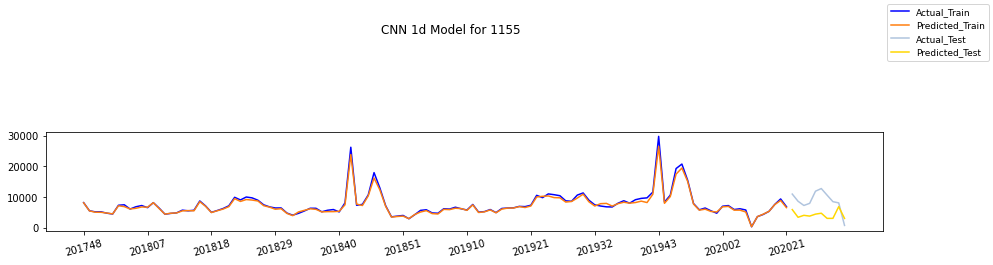

In [ ]:
plots_file_name = "Plots_CNN-1d_CK_"+str(df_train["hierarchy_4"].unique()[0])+".pdf"
pdf= expdf.PdfPages(plots_file_name)
number=0
desc_item = []
desc_item = list(df_test.groupby("hierarchy_4")["quantity_sold_orig"].agg("sum").reset_index().sort_values(by="quantity_sold_orig", ascending=False)["hierarchy_4"])
plt.rc('legend', fontsize=9)
for item in desc_item:
  
  temp1 = df_train[(df_train["hierarchy_4"]==item)].sort_values(by="year_week").reset_index(drop=True)
  temp1["flag"] = "Train"
  temp2 = df_test[(df_test["hierarchy_4"]==item)].sort_values(by="year_week").reset_index(drop=True)
  temp2["flag"] = "Test"
  temp = pd.concat([temp1,temp2],axis=0).sort_values(by="year_week").reset_index(drop=True)

  fig = plt.figure(figsize=(15,15))
  ax1=fig.add_subplot(711)

  fig.suptitle('CNN 1d Model for '+ str(temp["hierarchy_4"].unique()[0]))
  ax1.plot(temp[temp["flag"]=="Train"].index,temp[temp["flag"]=="Train"]["actual"] , label='Actual_Train',color = 'b')
  ax1.plot(temp[temp["flag"]=="Train"].index, temp[temp["flag"]=="Train"]["prediction"] ,label='Predicted_Train', color = 'tab:orange')
  ax1.plot(temp[temp["flag"]=="Test"].index, temp[temp["flag"]=="Test"]["actual"], label='Actual_Test', color = 'lightsteelblue')
  ax1.plot(temp[temp["flag"]=="Test"].index, temp[temp["flag"]=="Test"]['prediction'], label='Predicted_Test', color = 'gold')

  x_pos = [i for i in range(len(temp)) if i%11==0]
  x_ticks= [temp['year_week'][i] for i in range(len(temp)) if i%11==0]
  plt.xticks(x_pos, x_ticks,rotation=15)
  fig.legend()
  pdf.savefig(fig)
  #plt.close('all')
  number+=1

  
print("Number of items done "+str(number))
pdf.close()


# CNN 2d Model

In [ ]:
# First Reload data again and cleaning then run the model

In [ ]:
batch_size = 50
epochs =1000
# input image dimensions
img_rows, img_cols = 6, 6

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.values.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

AttributeError: ignored

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
from keras.layers.normalization import BatchNormalization
random.seed(123)
model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                  #metrics=[wape_keras]
                 )

model.summary()

In [ ]:
import time
start_time = time.time()
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
train_pred = model.predict(X_train)
preds = model.predict(X_test)

ytrainpred = np.exp(train_pred.reshape(train_pred.shape[0],) + df_train["mean_quantity_sold"].values)
ytrain = np.exp(y_train+df_train["mean_quantity_sold"].values)
df_train['prediction'] = ytrainpred
df_train['actual'] = ytrain

ytest = np.exp(y_test+df_test["mean_quantity_sold"].values)
ypred = np.exp(preds.reshape(preds.shape[0],) + df_test["mean_quantity_sold"].values)
df_test['prediction'] = ypred
df_test['actual'] = ytest

In [ ]:
df_train['Residual_abs'] = np.abs(ytrain - ytrainpred)
df_train["quantity_sold_orig"] = ytrain
df_train = df_train.reset_index(drop=True)
WAPE_summary=df_train.pivot_table(index=['hierarchy_4'], values=['quantity_sold_orig', 'Residual_abs'], aggfunc='sum').reset_index()
WAPE_summary.columns = ['hierarchy_4','Residual_sum_train', 'Actual_sum_train']
#hierarchy=hierarchy.merge(WAPE_summary, on='hierarchy_4', how='left')
WAPE_summary["WAPE_train"] = WAPE_summary["Residual_sum_train"]*100/WAPE_summary["Actual_sum_train"]
WAPE_summary.to_excel("CNN-2d_CK_"+str(df_train["hierarchy_4"].unique()[0])+"_train.xlsx",index=False)
WAPE_summary

In [ ]:
df_test['Residual_abs'] = np.abs(ytest - ypred)
df_test["quantity_sold_orig"] = ytest
df_test = df_test.reset_index(drop=True)
WAPE_summary=df_test.pivot_table(index=['hierarchy_4'], values=['quantity_sold_orig', 'Residual_abs'], aggfunc='sum').reset_index()
WAPE_summary.columns = ['hierarchy_4','Residual_sum_test', 'Actual_sum_test']
#hierarchy=hierarchy.merge(WAPE_summary, on='hierarchy_4', how='left')
WAPE_summary["WAPE_test"] = WAPE_summary["Residual_sum_test"]*100/WAPE_summary["Actual_sum_test"]
WAPE_summary

In [ ]:
plots_file_name = "Plots_CNN-2d_CK_"+str(df_train["hierarchy_4"].unique()[0])+".pdf"
pdf= expdf.PdfPages(plots_file_name)
number=0
desc_item = []
desc_item = list(df_test.groupby("hierarchy_4")["quantity_sold_orig"].agg("sum").reset_index().sort_values(by="quantity_sold_orig", ascending=False)["hierarchy_4"])
plt.rc('legend', fontsize=9)
for item in desc_item:
  
  temp1 = df_train[(df_train["hierarchy_4"]==item)].sort_values(by="year_week").reset_index(drop=True)
  temp1["flag"] = "Train"
  temp2 = df_test[(df_test["hierarchy_4"]==item)].sort_values(by="year_week").reset_index(drop=True)
  temp2["flag"] = "Test"
  temp = pd.concat([temp1,temp2],axis=0).sort_values(by="year_week").reset_index(drop=True)

  fig = plt.figure(figsize=(15,15))
  ax1=fig.add_subplot(711)

  fig.suptitle('CNN 2d Model for '+ str(temp["hierarchy_4"].unique()[0]))
  ax1.plot(temp[temp["flag"]=="Train"].index,temp[temp["flag"]=="Train"]["actual"] , label='Actual_Train',color = 'b')
  ax1.plot(temp[temp["flag"]=="Train"].index, temp[temp["flag"]=="Train"]["prediction"] ,label='Predicted_Train', color = 'tab:orange')
  ax1.plot(temp[temp["flag"]=="Test"].index, temp[temp["flag"]=="Test"]["actual"], label='Actual_Test', color = 'lightsteelblue')
  ax1.plot(temp[temp["flag"]=="Test"].index, temp[temp["flag"]=="Test"]['prediction'], label='Predicted_Test', color = 'gold')

  x_pos = [i for i in range(len(temp)) if i%11==0]
  x_ticks= [temp['year_week'][i] for i in range(len(temp)) if i%11==0]
  plt.xticks(x_pos, x_ticks,rotation=15)
  fig.legend()
  pdf.savefig(fig)
  #plt.close('all')
  number+=1

  
print("Number of items done "+str(number))
pdf.close()

# df_pred["prediction"] = np.exp(df_pred["mean_quantity_sold"])*df_pred["prediction"]
# df_pred.to_excel("df_pred_normal.xlsx",index=False)